Crime Data Analysis And Visualization for New Orleans 2021

Used Libraries: 
NumPy, Pandas, Matplotlib, Seaborn, Plotly, Missigno, Folium

Data Source:
https://catalog.data.gov/dataset/electronic-police-report-2021

In [1]:
#Import libraries and visualization tools
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization Tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%config InlineBackend.figure_format = 'retina'
sns.set(rc={'figure.figsize':(20,14)})

#Check pathname for input csv file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/neworleansepr2021/Electronic_Police_Report_2021 (1).csv


In [2]:
#Read a comma-separated values (csv) file into DataFrame.
df=pd.read_csv("../input/neworleansepr2021/Electronic_Police_Report_2021 (1).csv", encoding = "ISO-8859-1", low_memory = False)

In [3]:
#Sample dataframe 
df.sample(5)

Item_Number  District                 Location Disposition Signal_Type  \
58550  E-20562-21         8   003XX Dauphine St #450        OPEN         103   
91465  J-17925-21         3  035XX Roger Williams Dr        OPEN        103D   
63365  D-27550-21         7          139XX Linden St        OPEN        103D   
62310  J-19371-21         5         021XX N Tonti St        OPEN         103   
78783  B-05043-21         7            067XX Tara Ln      CLOSED         35D   

              Signal_Description Occurred_Date_Time Occurred_Time  \
58550                DISTURBANCE     5/16/2021 3:41          3:41   
91465     DISTURBANCE (DOMESTIC)    10/15/2021 9:30          9:30   
63365     DISTURBANCE (DOMESTIC)     4/21/2021 1:45          1:45   
62310                DISTURBANCE    10/16/2021 4:05          4:05   
78783  SIMPLE BATTERY (DOMESTIC)     2/4/2021 19:30         19:30   

       Charge_Code                                 Charge_Description  \
58550          NaN                                                NaN   
91465          NaN                                                NaN   
63365          NaN                                                NaN   
62310          NaN                                                NaN   
78783  14 35.3(I)   DOMESTIC ABUSE BATTERY (CHILD ENDANGERMENT. CH...   

       Offender_Number  OffenderID OffenderStatus Offender_Race  \
58550              NaN         NaN            NaN           NaN   
91465              NaN         NaN            NaN           NaN   
63365              NaN         NaN            NaN           NaN   
62310              NaN         NaN            NaN           NaN   
78783              1.0    667588.0       ARRESTED         BLACK   

      Offender_Gender  Offender_Age  Victim_Number        PersonType  \
58550             NaN           NaN            4.0         INTERVIEW   
91465             NaN           NaN            3.0         INTERVIEW   
63365             NaN           NaN            1.0  REPORTING PERSON   
62310             NaN           NaN            2.0         INTERVIEW   
78783            MALE          34.0            3.0            VICTIM   

      Victim_Race Victim_Gender  Victim_Age Victim_Fatal_Status Hate Crime  \
58550       WHITE        FEMALE        36.0           Non-fatal        NaN   
91465       BLACK        FEMALE        71.0           Non-fatal        NaN   
63365       BLACK        FEMALE        20.0           Non-fatal        NaN   
62310       BLACK          MALE        71.0           Non-fatal        NaN   
78783       BLACK        FEMALE         1.0           Non-fatal        NaN   

               Report Type  Longitude   Latitude  
58550      Incident Report -90.096749  29.963181  
91465      Incident Report        NaN        NaN  
63365      Incident Report -90.103912  29.967561  
62310      Incident Report -90.102681  30.004116  
78783  Supplemental Report        NaN        NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100518 entries, 0 to 100517
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Item_Number          100518 non-null  object 
 1   District             100518 non-null  int64  
 2   Location             100518 non-null  object 
 3   Disposition          100518 non-null  object 
 4   Signal_Type          100518 non-null  object 
 5   Signal_Description   100518 non-null  object 
 6   Occurred_Date_Time   100518 non-null  object 
 7   Occurred_Time        100518 non-null  object 
 8   Charge_Code          46955 non-null   object 
 9   Charge_Description   46955 non-null   object 
 10  Offender_Number      60646 non-null   float64
 11  OffenderID           60646 non-null   float64
 12  OffenderStatus       17865 non-null   object 
 13  Offender_Race        57961 non-null   object 
 14  Offender_Gender      57700 non-null   object 
 15  Offender_Age     

In [5]:
df.isnull().sum()

Item_Number                 0
District                    0
Location                    0
Disposition                 0
Signal_Type                 0
Signal_Description          0
Occurred_Date_Time          0
Occurred_Time               0
Charge_Code             53563
Charge_Description      53563
Offender_Number         39872
OffenderID              39872
OffenderStatus          82653
Offender_Race           42557
Offender_Gender         42818
Offender_Age            75788
Victim_Number            1482
PersonType               1482
Victim_Race             13316
Victim_Gender           13262
Victim_Age              19932
Victim_Fatal_Status         0
Hate Crime             100470
Report Type                 0
Longitude               24695
Latitude                24695
dtype: int64

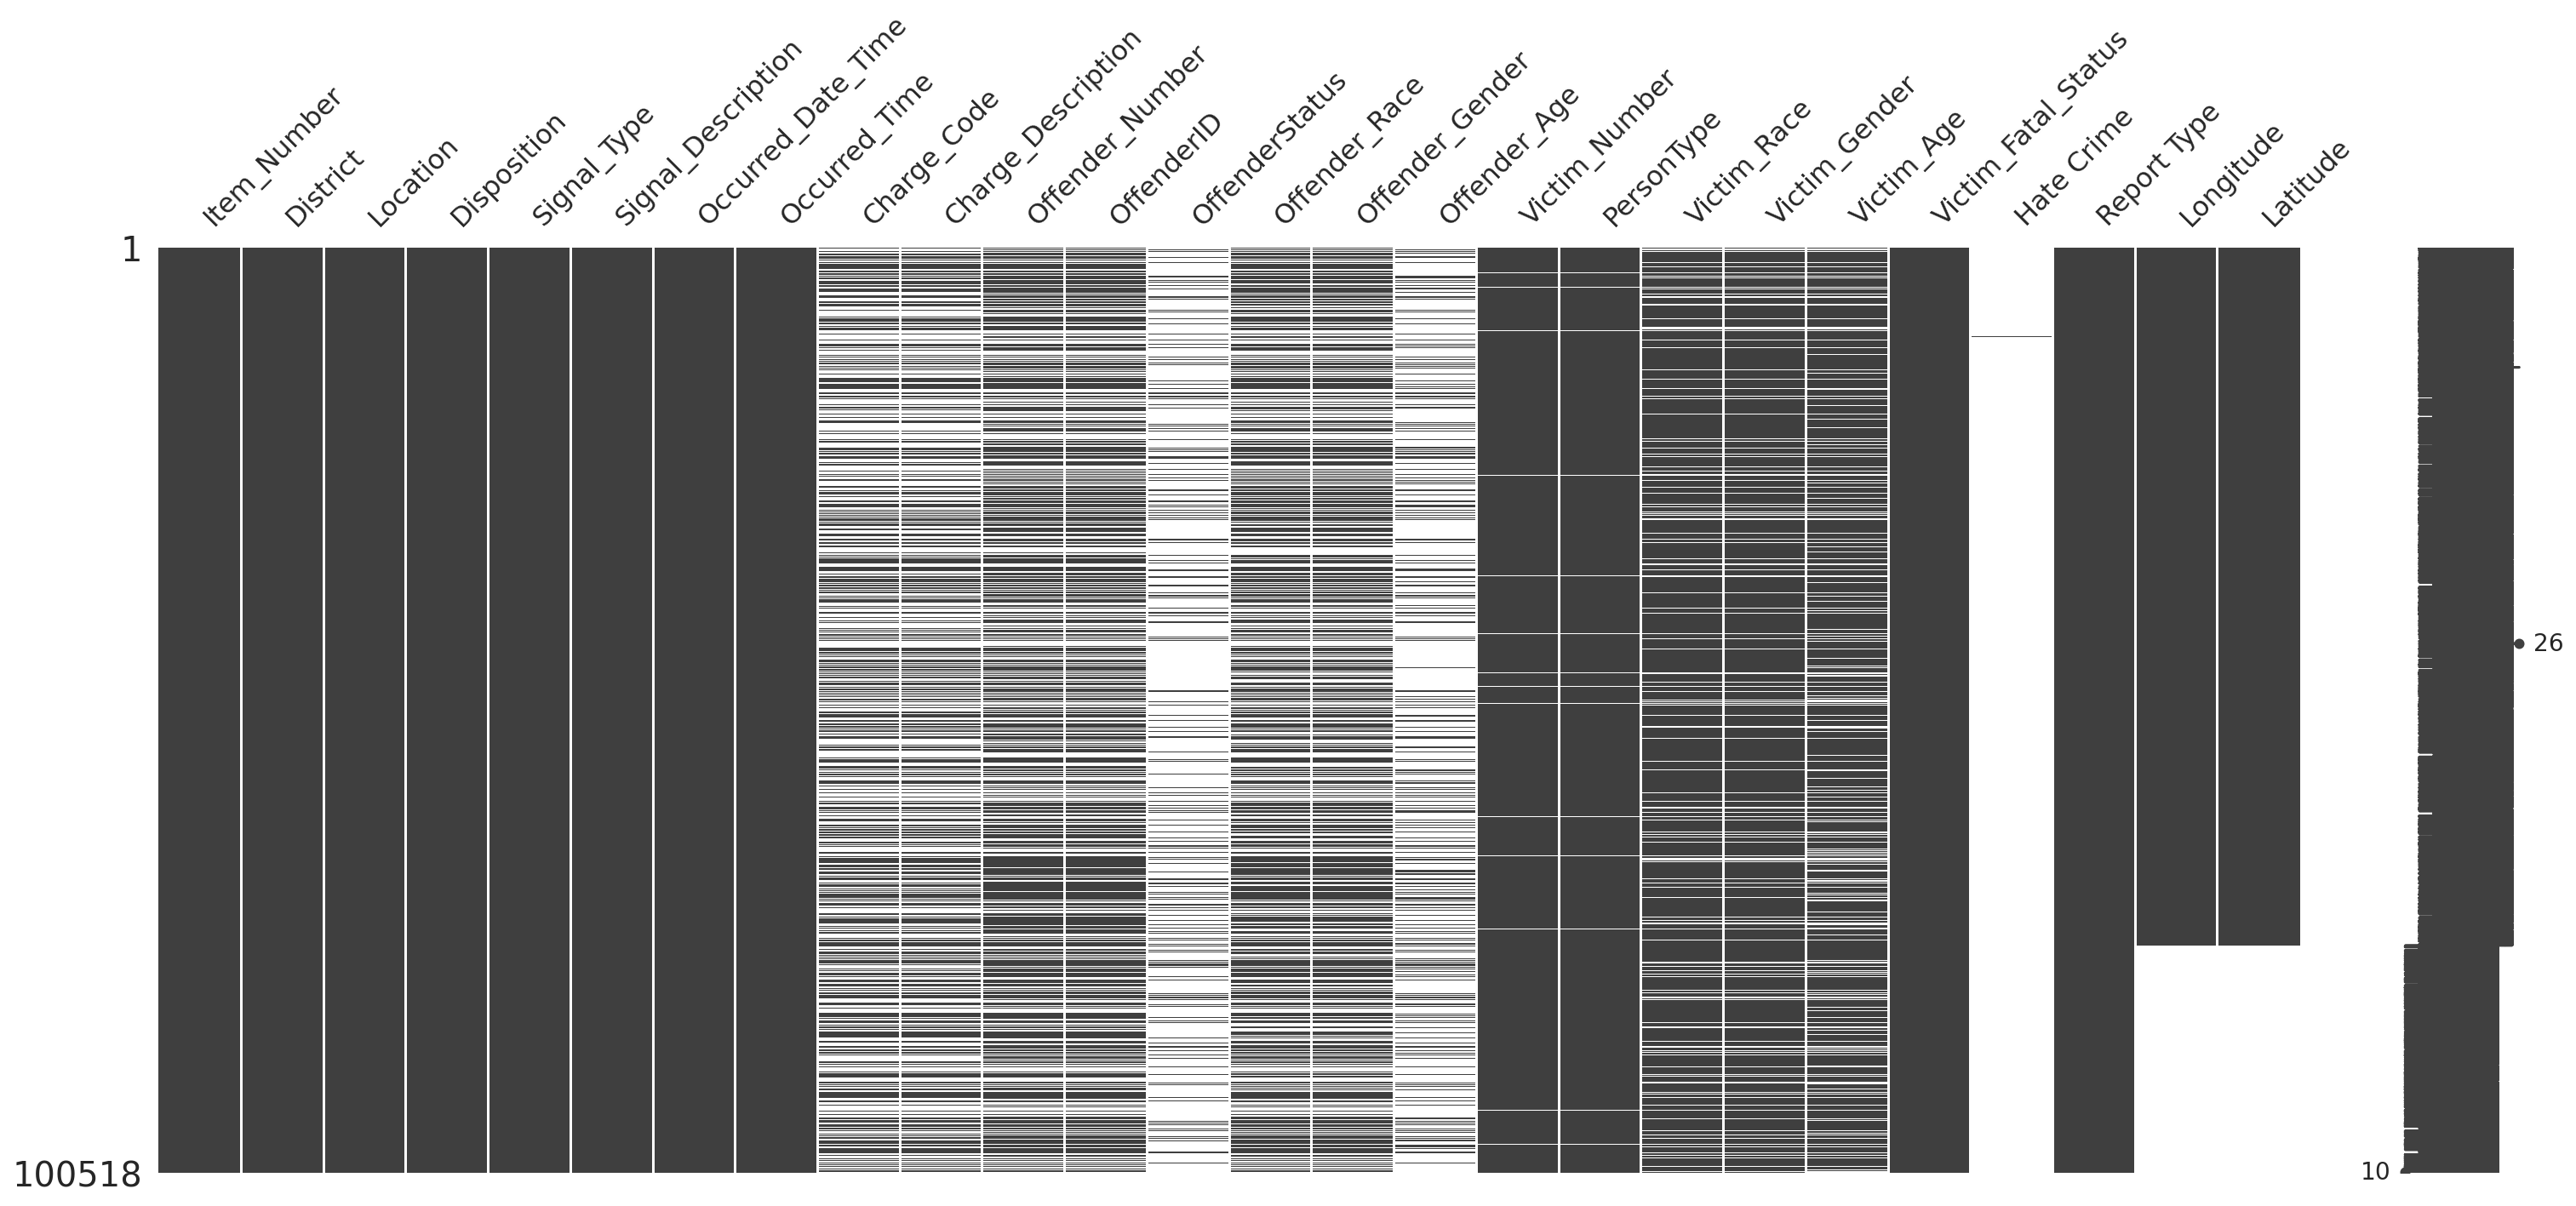

In [6]:
import missingno as msno
msno.matrix(df)
plt.show()

In [7]:
df.columns

Index(['Item_Number', 'District', 'Location', 'Disposition', 'Signal_Type',
       'Signal_Description', 'Occurred_Date_Time', 'Occurred_Time',
       'Charge_Code', 'Charge_Description', 'Offender_Number', 'OffenderID',
       'OffenderStatus', 'Offender_Race', 'Offender_Gender', 'Offender_Age',
       'Victim_Number', 'PersonType', 'Victim_Race', 'Victim_Gender',
       'Victim_Age', 'Victim_Fatal_Status', 'Hate Crime', 'Report Type',
       'Longitude', 'Latitude'],
      dtype='object')

In [8]:
df.drop(columns=['Item_Number', 'District', 'Location', 'Disposition', 'Signal_Type','Occurred_Date_Time', 'Charge_Code', 'OffenderID', 'OffenderStatus', 'Offender_Race', 'PersonType', 'Victim_Race', 'Hate Crime', 'Report Type'], inplace=True)

In [9]:
df.columns

Index(['Signal_Description', 'Occurred_Time', 'Charge_Description',
       'Offender_Number', 'Offender_Gender', 'Offender_Age', 'Victim_Number',
       'Victim_Gender', 'Victim_Age', 'Victim_Fatal_Status', 'Longitude',
       'Latitude'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100518 entries, 0 to 100517
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Signal_Description   100518 non-null  object 
 1   Occurred_Time        100518 non-null  object 
 2   Charge_Description   46955 non-null   object 
 3   Offender_Number      60646 non-null   float64
 4   Offender_Gender      57700 non-null   object 
 5   Offender_Age         24730 non-null   float64
 6   Victim_Number        99036 non-null   float64
 7   Victim_Gender        87256 non-null   object 
 8   Victim_Age           80586 non-null   float64
 9   Victim_Fatal_Status  100518 non-null  object 
 10  Longitude            75823 non-null   float64
 11  Latitude             75823 non-null   float64
dtypes: float64(6), object(6)
memory usage: 9.2+ MB


In [11]:
#Basic statistical summaries of all numerical attributes in the dataframe
df.describe()

Offender_Number  Offender_Age  Victim_Number    Victim_Age  \
count     60646.000000  24730.000000   99036.000000  80586.000000   
mean          1.171141     33.805985       1.482956     40.069528   
std           0.596838     12.471572       1.085520     15.486120   
min          -4.000000      0.000000      -2.000000      0.000000   
25%           1.000000     25.000000       1.000000     29.000000   
50%           1.000000     32.000000       1.000000     38.000000   
75%           1.000000     41.000000       2.000000     50.750000   
max          30.000000    121.000000      93.000000    121.000000   

          Longitude      Latitude  
count  75823.000000  75823.000000  
mean     -90.059641     29.970000  
std        0.047312      0.037789  
min      -90.474226     28.242005  
25%      -90.094744     29.944703  
50%      -90.068803     29.963705  
75%      -90.033615     29.994108  
max      -88.468840     30.341125

In [12]:
 pd.crosstab(df['Charge_Description'], df['Victim_Fatal_Status'])

Victim_Fatal_Status                                 Fatal  Non-fatal
Charge_Description                                                  
2ND DEGREE CRUELTY TO JUVENILES                         0          6
ACCESS DEVICE APPLICATION FRAUD                         0          2
ACCESS DEVICE FRAUD                                     0        103
ACCESSORY - AGG. ASSAULT                                0          9
ACCESSORY - AGG. BATTERY                                0          6
ACCESSORY - AGG. KIDNAPPING                             0          1
ACCESSORY - ARMED ROBBERY                               0          8
ACCESSORY - SIMPLE BURGLARY                             0         18
ACCESSORY - SIMPLE KIDNAPPING                           0          1
ACCESSORY - SIMPLE ROBBERY                              0          6
ACCESSORY - THEFT                                       0         15
ACCESSORY TO POSSESSION OF SCHEDULE I CDS               0          2
ACTS OF DOMESTIC VIOLENCE                               0          1
ACTS OF DOMESTIC VIOLENCE(STRANGULATION)                0         37
ACTS OF DOMESTIC VIOLENCE(STRANGULATION) - AGGR...      0         36
ACTS OF DOMESTIC VIOLENCE(STRANGULATION) - SIMPLE       0        193
AGG. ARSON                                              0         12
AGG. ASSAULT                                            0        582
AGG. BATTERY                                            1        627
AGG. BURGLARY                                           0        102
AGG. CRIMINAL DAMAGE                                    1        547
AGG. KIDNAPPING                                         0          7
AGG. OBSTRUCTION OF A HIGHWAY                           0          2
AGG. SECOND DEGREE BATTERY                              1        150
AGG. SEXUAL BATTERY                                     0          1
AGGRAVATED ASSAULT UPON A DATING PARTNER                0         20
AGGRAVATED ASSAULT UPON A PEACE OFFICER                 0          2
AGGRAVATED ASSAULT WITH A FIREARM                       1        743
AGGRESSIVE PANHANDLING                                  0          2
AGGRESSIVE SOLICITATION                                 0          4
ALCOHOL IN VEHICLE                                      0          2
ARMED ROBBERY                                           0        336
ASSAULT                                                 0        116
ASSAULT BY DRIVE BY SHOOTING                            0         18
ASSAULT ON PEACE OFFICER (FIREARM)                      0          6
ATTEMPT -  ENTRY-BUSINESS                               0         10
ATTEMPT -  ENTRY-DWELLING                               0          6
ATTEMPT - ACCESS DEVICE FRAUD                           0          4
ATTEMPT - AGG. KIDNAPPING                               0          1
ATTEMPT - ARMED ROBBERY                                 0         54
ATTEMPT - BANK FRAUD                                    0          6
ATTEMPT - CARJACKING                                    0         35
ATTEMPT - CREDIT CARD FRAUD                             0         12
ATTEMPT - CRIMINAL DAMAGE                               0          2
ATTEMPT - DISARMING A PEACE OFFICER                     0          3
ATTEMPT - EXTORTION                                     0          2
ATTEMPT - FIRST DEGREE MURDER                           0         18
ATTEMPT - FIRST DEGREE ROBBERY                          0          1
ATTEMPT - FORGERY                                       0          1
ATTEMPT - HOME INVASION                                 0          1
ATTEMPT - IMPERSONATION                                 0          2
ATTEMPT - MONETARY INSTRUMENT ABUSE                     0          4
ATTEMPT - POSSESSION STOLEN THINGS                      0          1
ATTEMPT - PURSE SNATCHING                               0         22
ATTEMPT - SECOND DEGREE KIDNAPPING                      0          1
ATTEMPT - SECOND DEGREEMURDER                           2         5

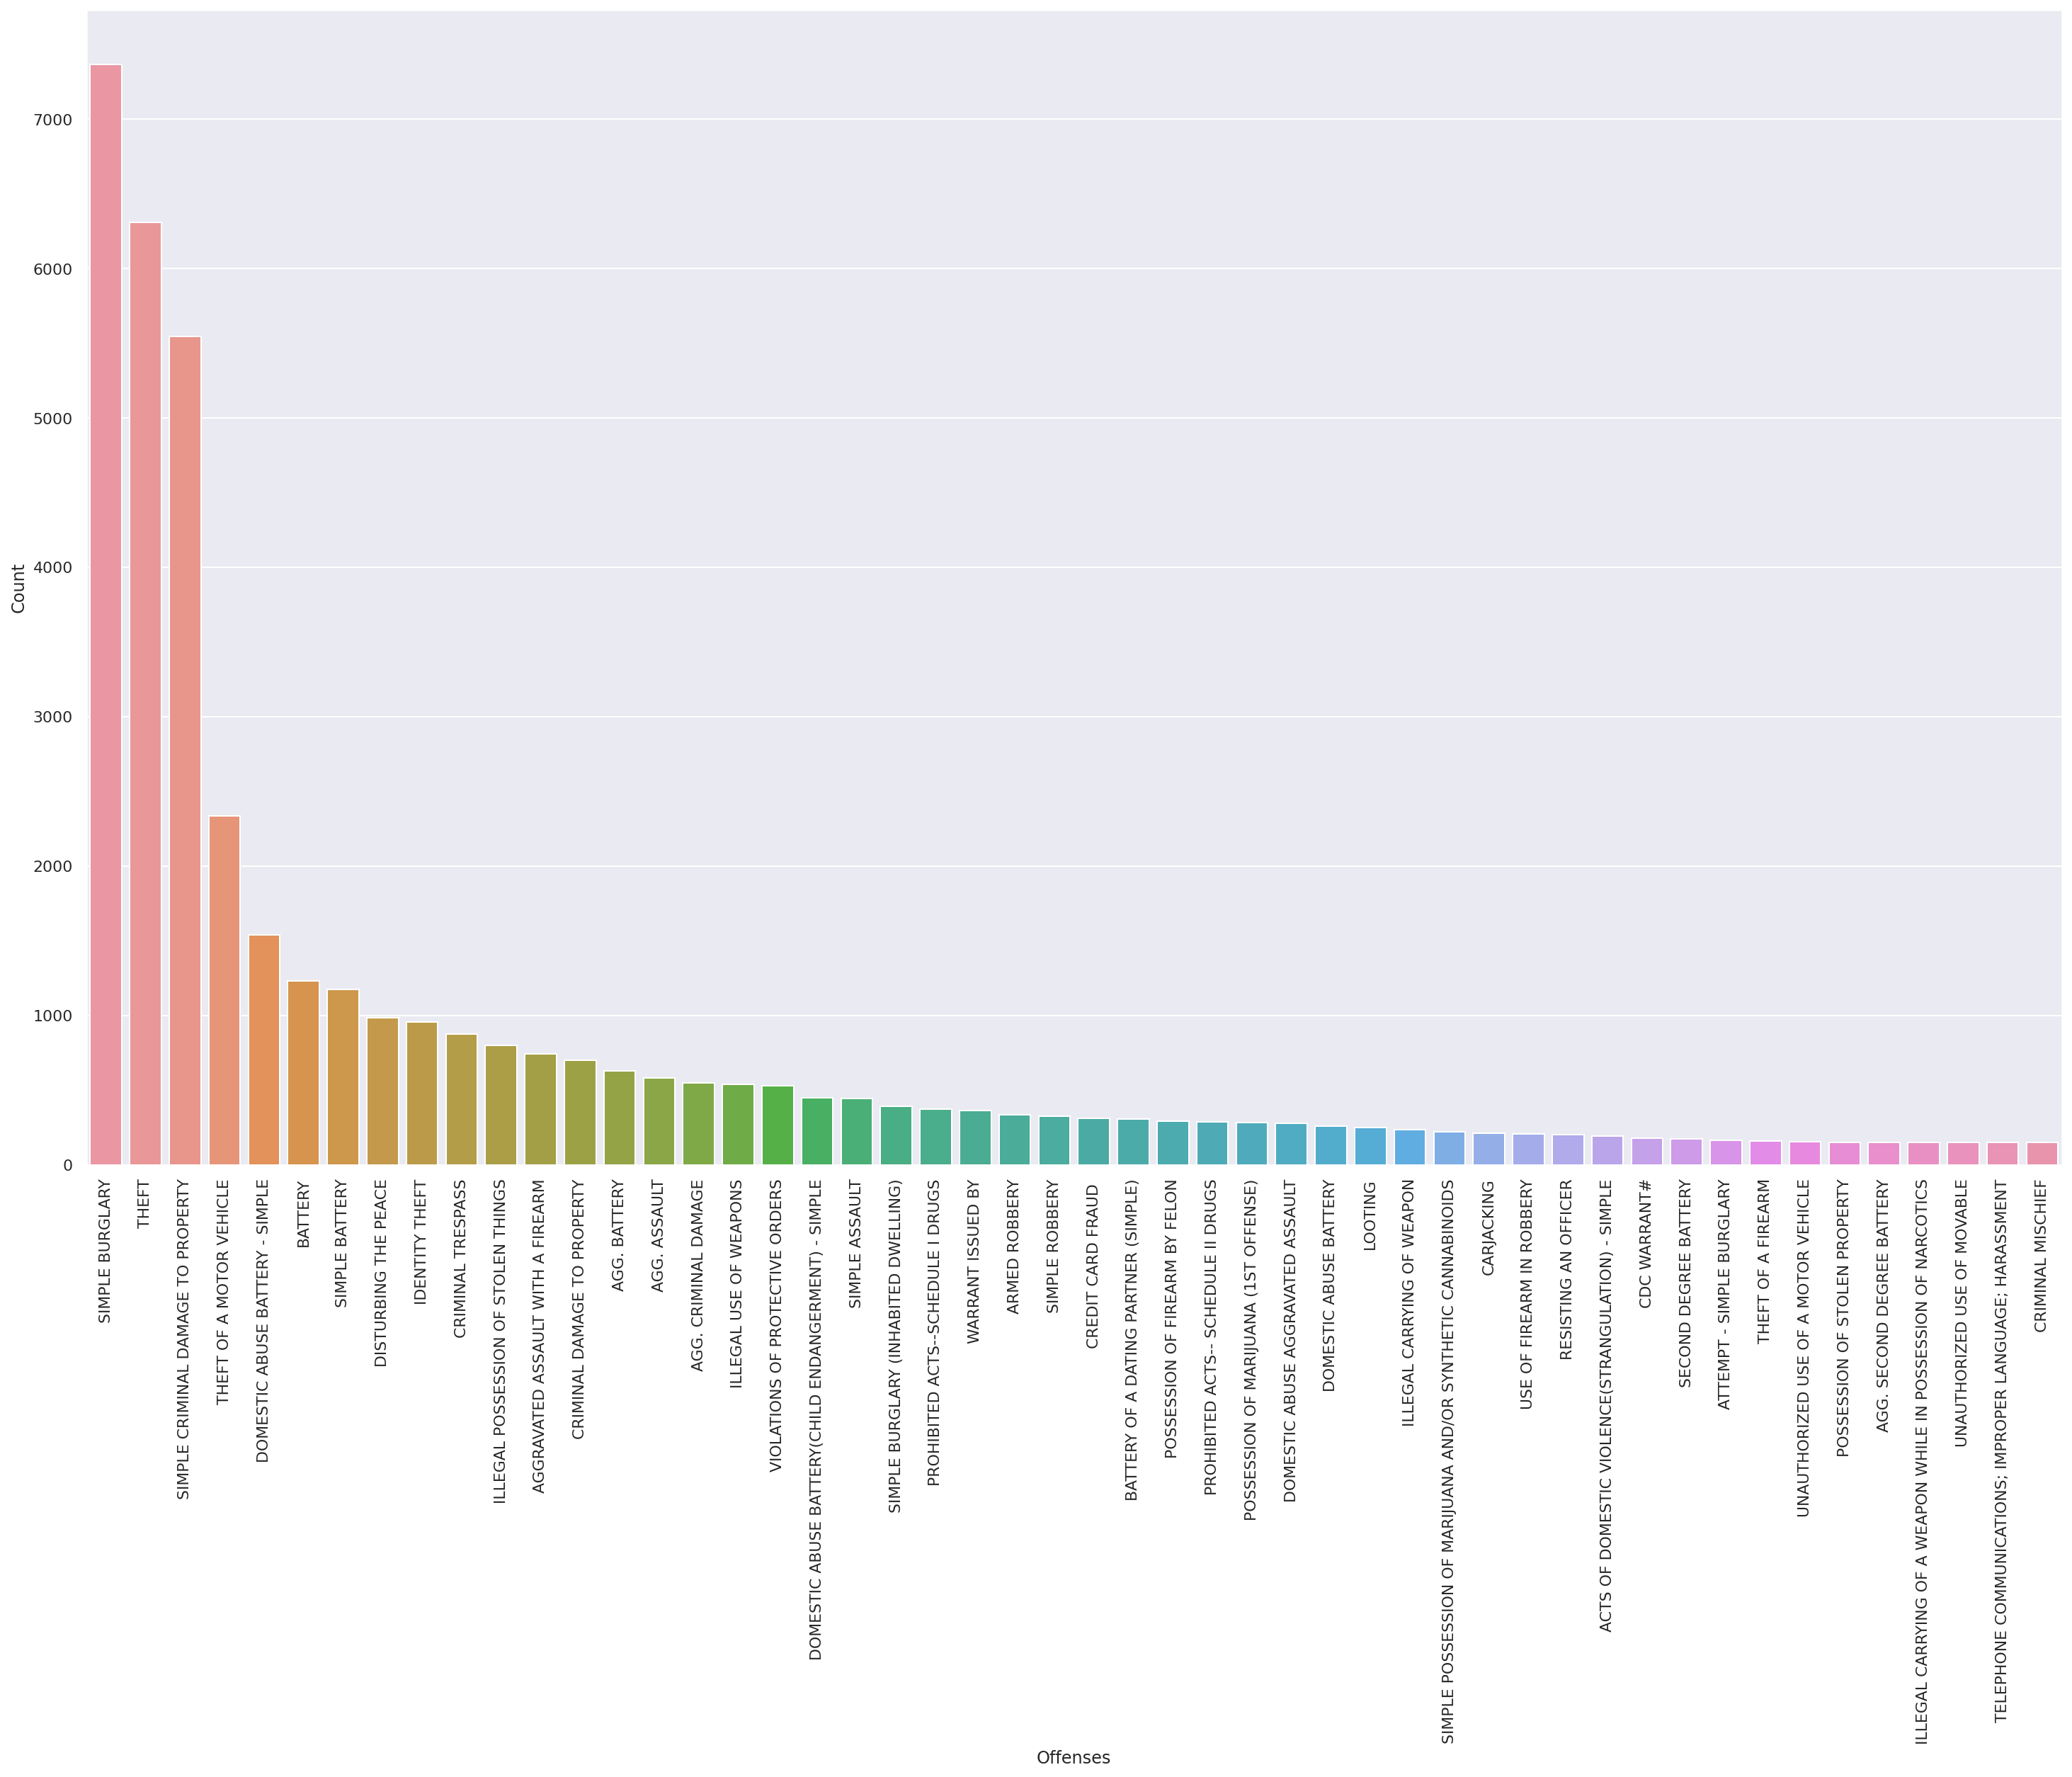

In [13]:
df2 = pd.DataFrame(columns = ['Offenses'])
df2["Offenses"]=[each for each in df.Charge_Description.unique()]
df2["Count"]=[len(df[df.Charge_Description==each]) for each in df2.Offenses]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.Offenses.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Offenses')
plt.ylabel('Count')
plt.show()

In [14]:
fig = px.scatter_mapbox(df[df["Charge_Description"] == "CARJACKING"], lat="Latitude", lon="Longitude", hover_name="Charge_Description", hover_data=["Occurred_Time"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [15]:
vand = df[df["Charge_Description"] == "CARJACKING"].iloc[:,10:12]
vand.rename(columns={'Longitude':'longitude', 'Latitude':'latitude'}, inplace=True)
vand.longitude.fillna(0, inplace = True)
vand.latitude.fillna(0, inplace = True)
columns_titles = ["latitude","longitude"]
vand=vand.reindex(columns=columns_titles)
#Below used to check dataframe is in correct order
#vand.info()
#vand.sample(5)

NolaMap=folium.Map(location=[29.9,-90], tiles='OpenStreetMap', zoom_start=12)
HeatMap(data=vand, radius=16).add_to(NolaMap)

NolaMap

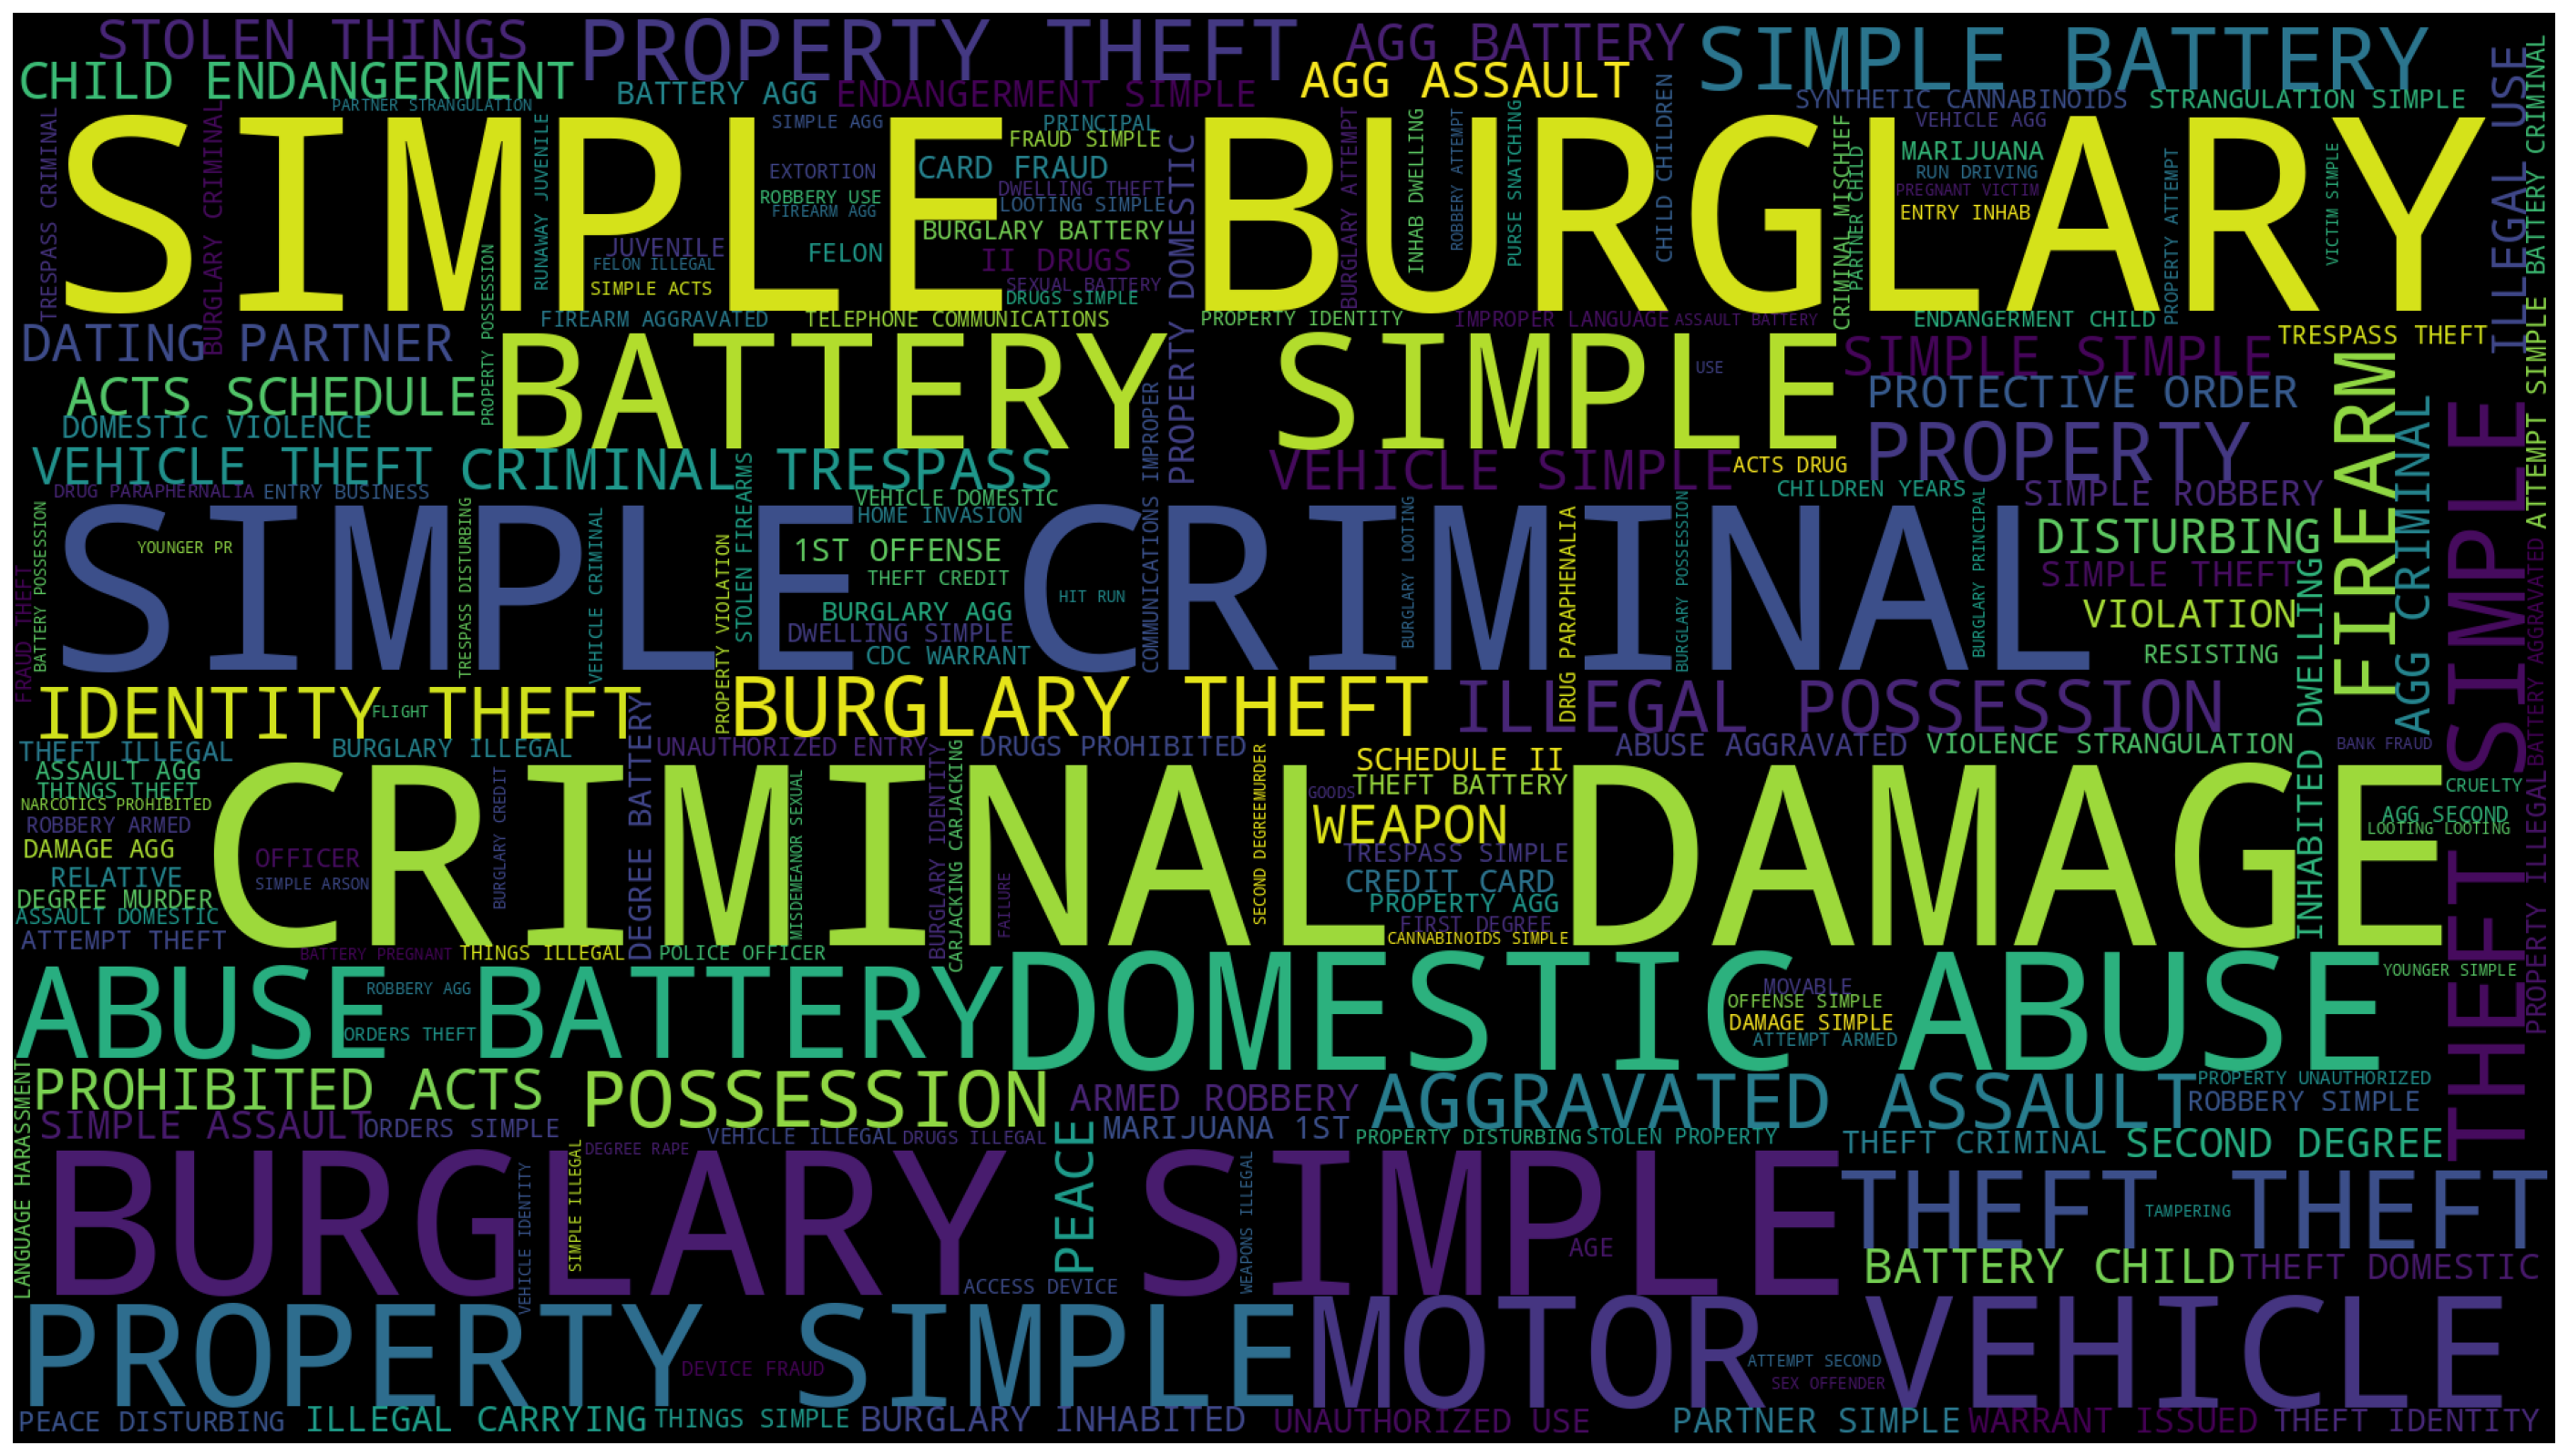

In [16]:
#Allocate dataframe to new str type dataframe
df3 = df.astype(str)
#Remove Charge Descritions with value of nan (not available)
df3 = df3.loc[df3["Charge_Description"] != "nan"]
#Create wordcloud size of words is based on occurence of Charge Descriptions (larger means they occured more)
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df3.Charge_Description))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [17]:
df4 = df[df['Offender_Gender'] != 'UNKNOWN']
df4 = df4[df4['Offender_Age'] <= 91]
df4 = df4[df4['Offender_Age'] >= 8]
fig = px.box(df4, x='Offender_Gender', y='Offender_Age')
fig.show()

<AxesSubplot:xlabel='Offender_Age', ylabel='count'>

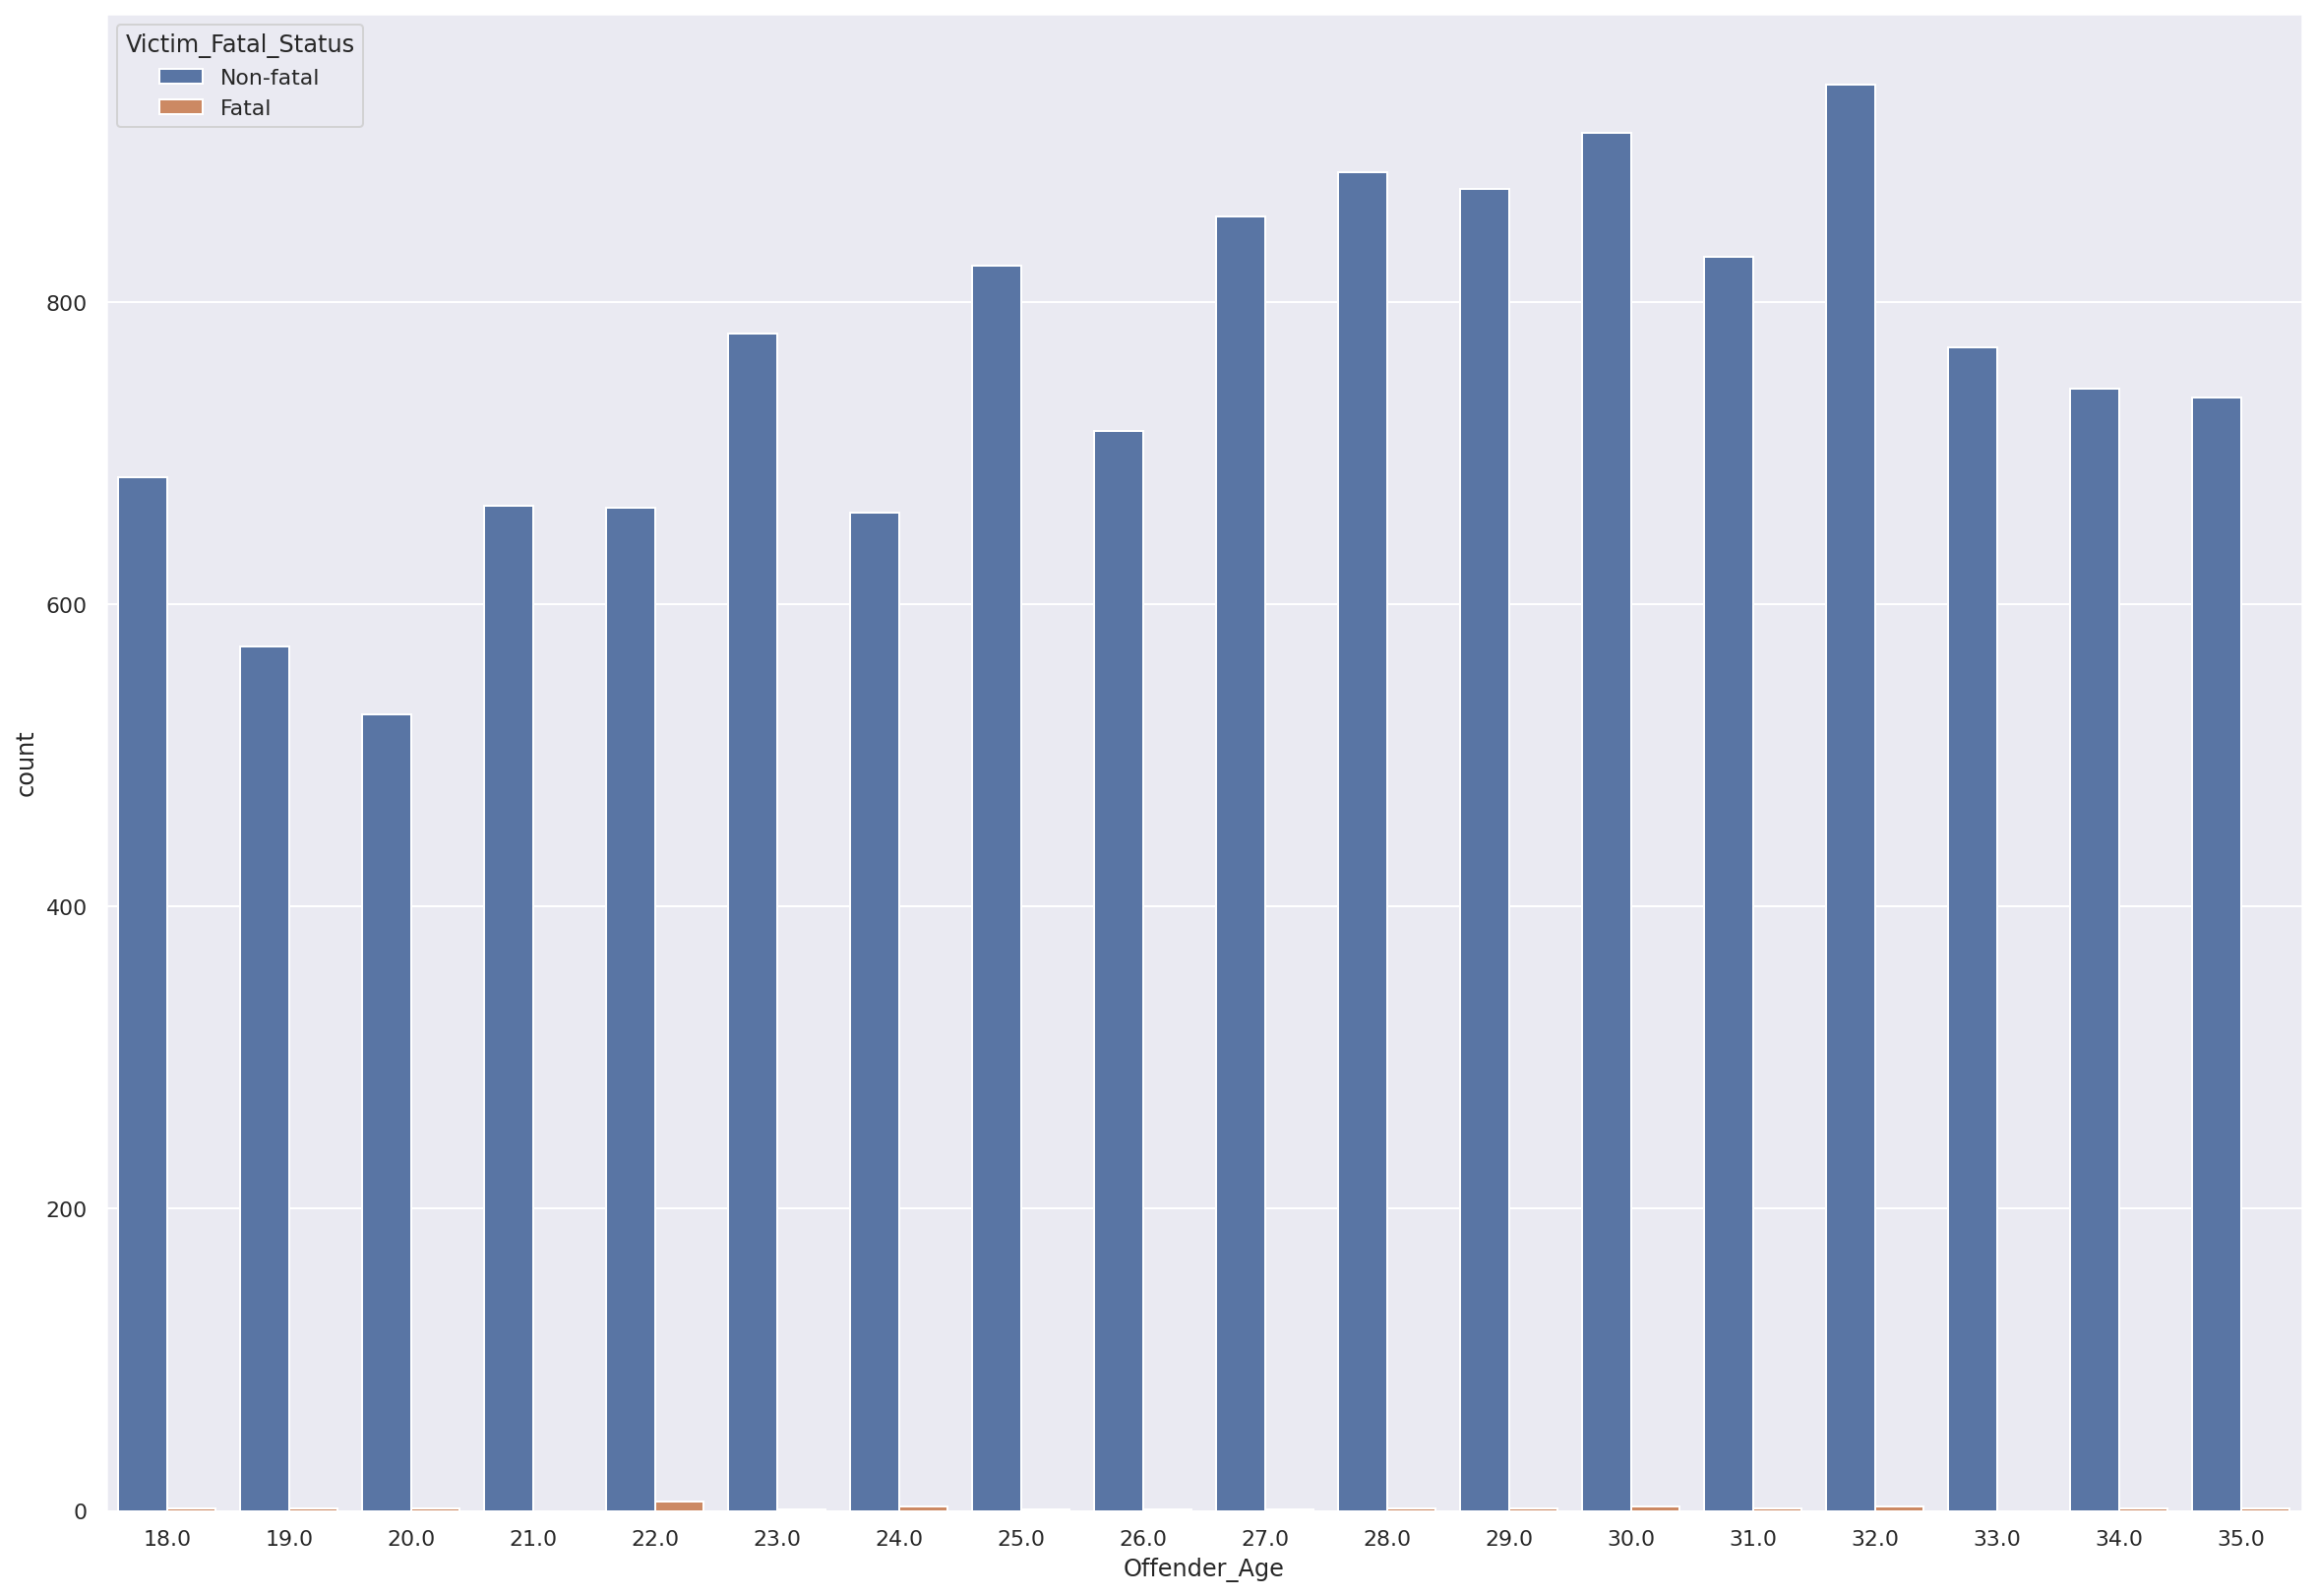

In [18]:
#Chart for criminal 18-35 w/ fatality status
df5 = df[df['Offender_Age'] <= 35]
df5 = df5[df5['Offender_Age'] >= 18]
sns.countplot(x='Offender_Age', hue='Victim_Fatal_Status', data=df5)

<AxesSubplot:xlabel='Offender_Age', ylabel='count'>

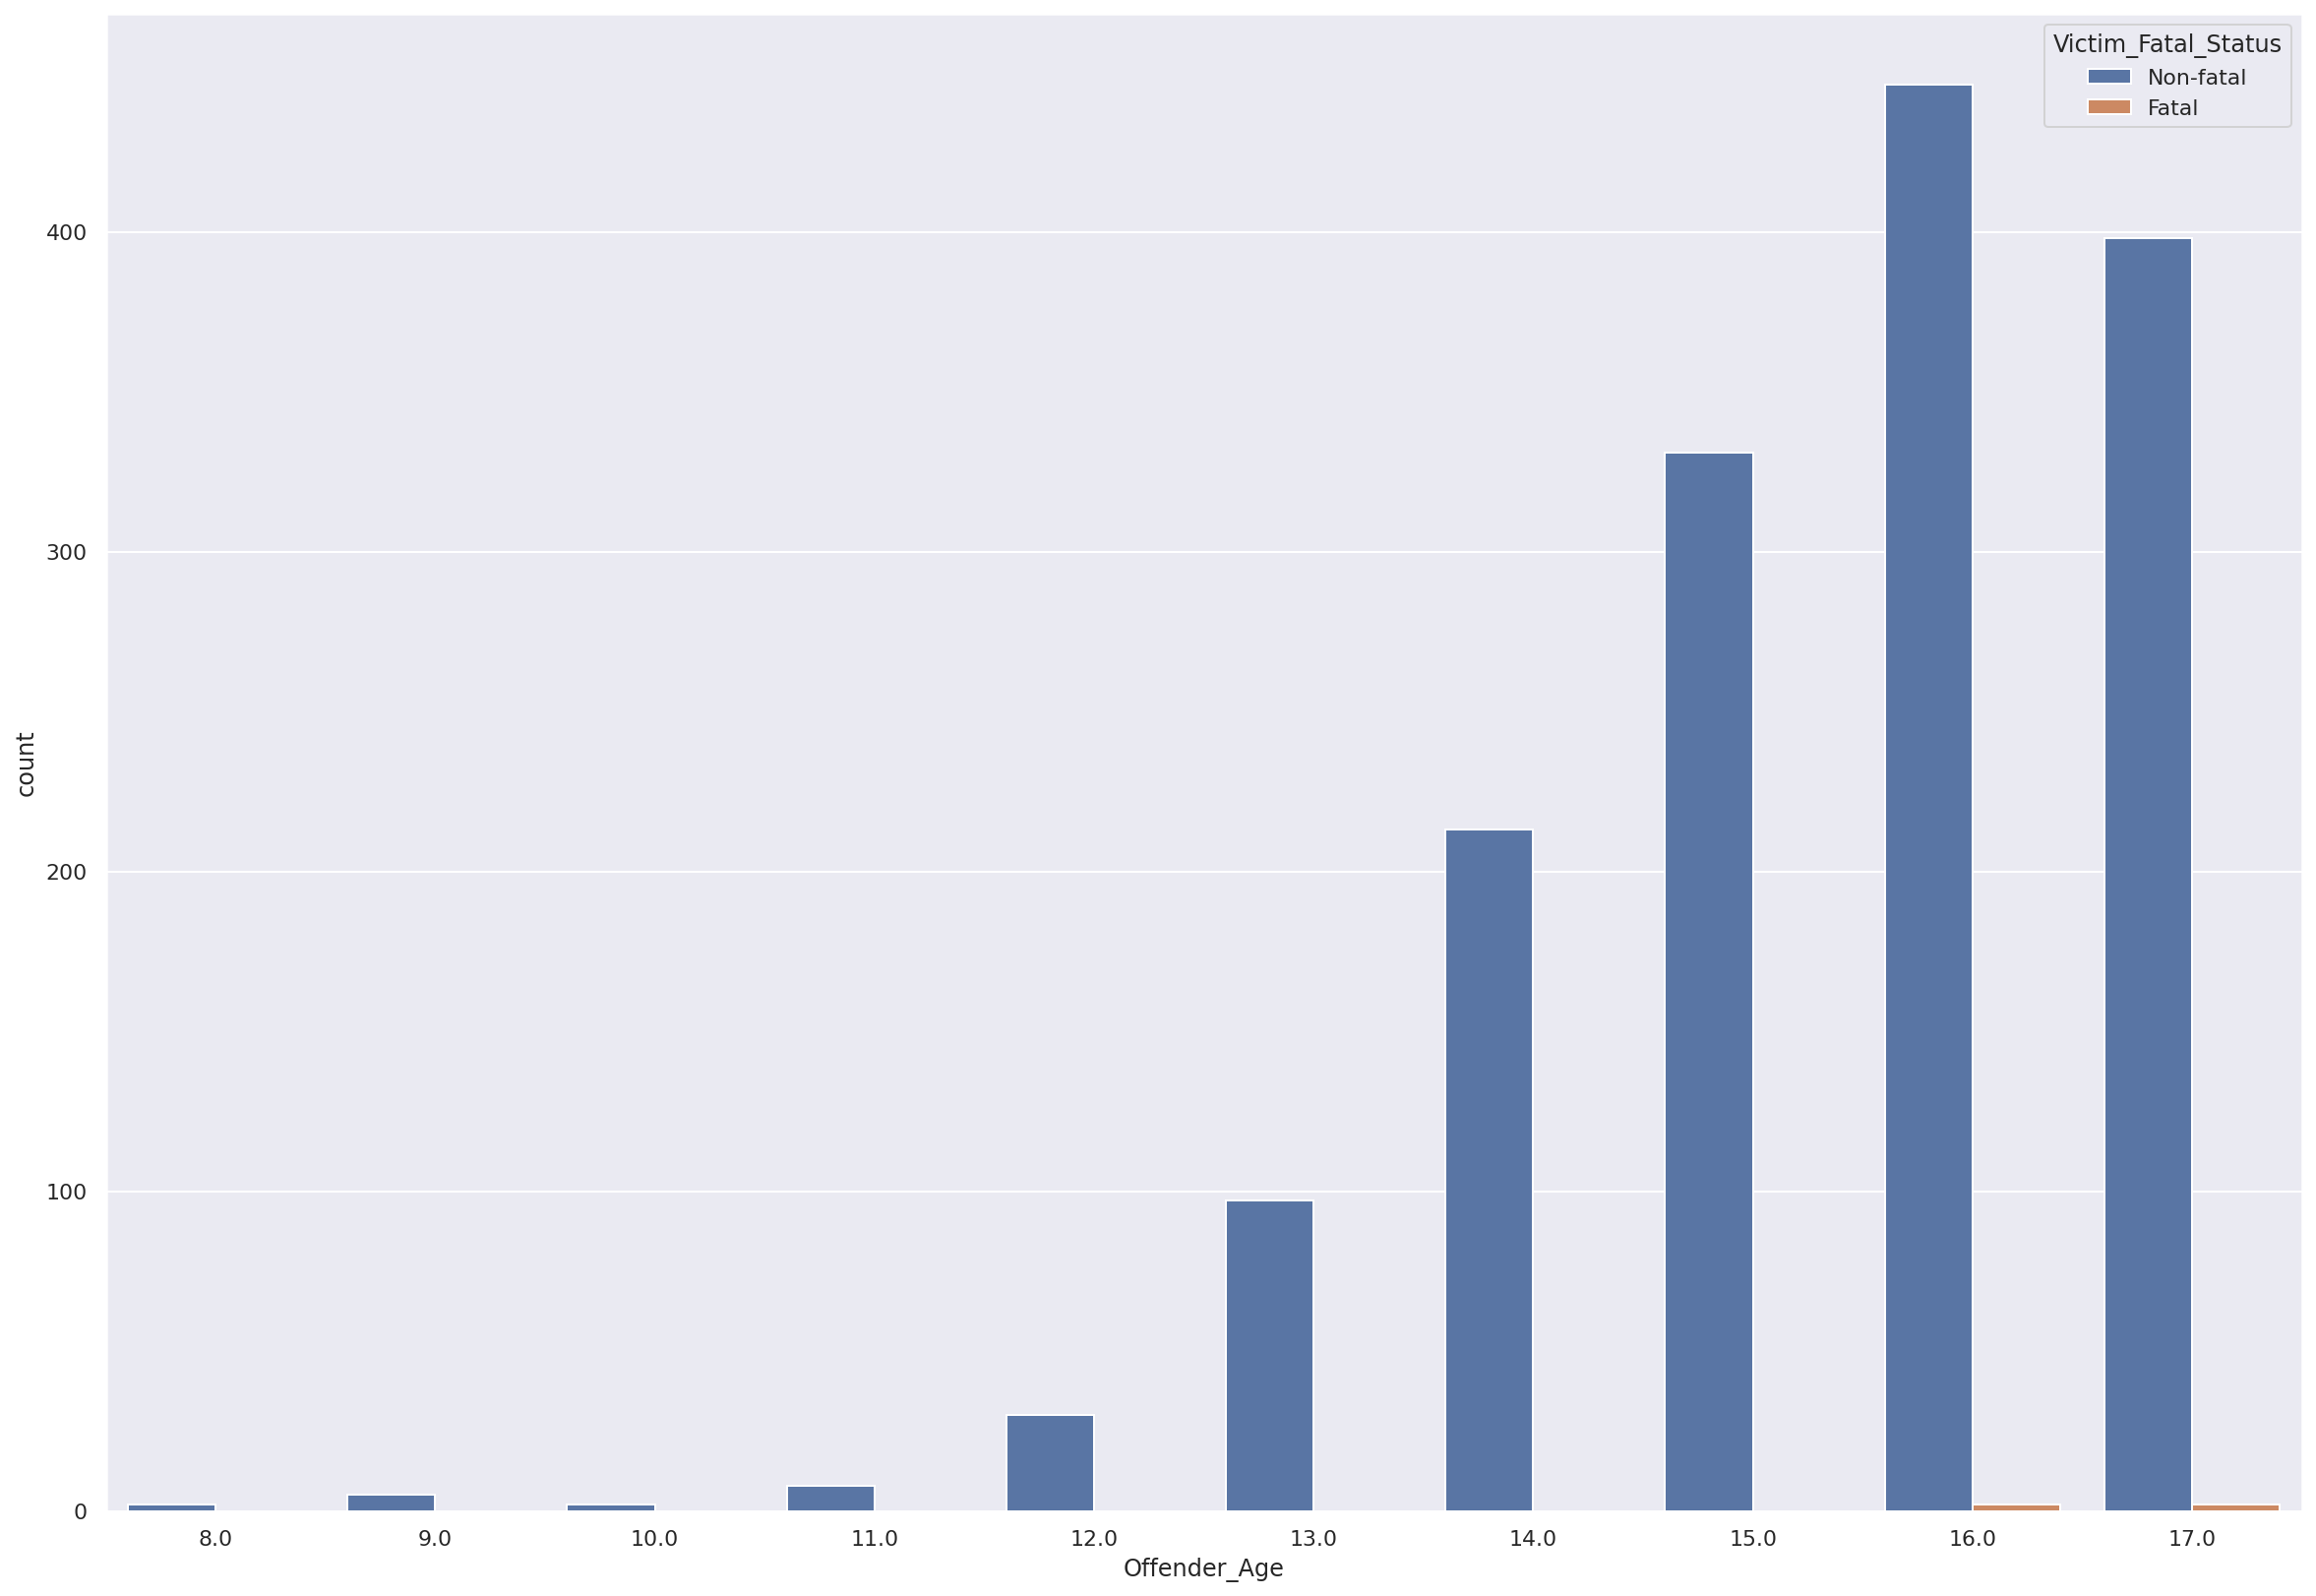

In [19]:
#Chart for criminal minors w/ fatality status
df6 = df[df['Offender_Age'] < 18]
df6 = df6[df6['Offender_Age'] >= 8]
sns.countplot(x='Offender_Age', hue='Victim_Fatal_Status', data=df6)